<a href="https://colab.research.google.com/github/lalitha-sahitya/Predicting-Insurance-Premiums/blob/main/insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/playground-series-s4e12')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········


100%|██████████| 75.5M/75.5M [00:01<00:00, 59.4MB/s]



Extracting archive ./playground-series-s4e12/playground-series-s4e12.zip to ./playground-series-s4e12


In [ ]:
os.listdir('playground-series-s4e12')

['test.csv', 'sample_submission.csv', 'train.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/playground-series-s4e12/train.csv')
data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [ ]:
test_data=pd.read_csv('/content/playground-series-s4e12/test.csv')
test_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [ ]:
data=data.drop('id',axis=1)
test_data=test_data.drop('id',axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-

In [ ]:
data.isnull().sum()

,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0
Policy Type,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   787511 non-null  float64
 1   Gender                800000 non-null  object 
 2   Annual Income         770140 non-null  float64
 3   Marital Status        787664 non-null  object 
 4   Number of Dependents  726870 non-null  float64
 5   Education Level       800000 non-null  object 
 6   Occupation            560875 non-null  object 
 7   Health Score          750551 non-null  float64
 8   Location              800000 non-null  object 
 9   Policy Type           800000 non-null  object 
 10  Previous Claims       557198 non-null  float64
 11  Vehicle Age           799997 non-null  float64
 12  Credit Score          708549 non-null  float64
 13  Insurance Duration    799998 non-null  float64
 14  Policy Start Date     800000 non-null  object 
 15  

In [ ]:
test_data.isnull().sum()

,0
Age,12489
Gender,0
Annual Income,29860
Marital Status,12336
Number of Dependents,73130
Education Level,0
Occupation,239125
Health Score,49449
Location,0
Policy Type,0


In [ ]:
test_data.duplicated().sum()

0

In [ ]:
data['Policy Start Date']=pd.to_datetime(data['Policy Start Date']).dt.year
data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021,Poor,Yes,Weekly,House,2022.0


In [ ]:
test_data['Policy Start Date']=pd.to_datetime(test_data['Policy Start Date']).dt.year

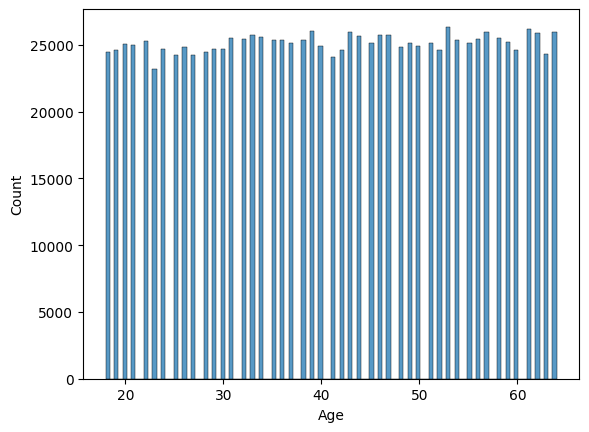

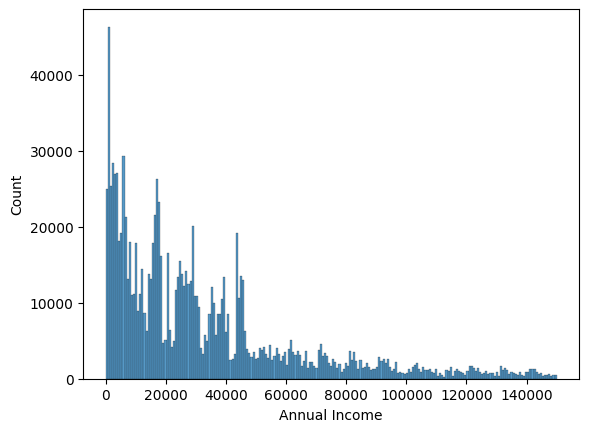

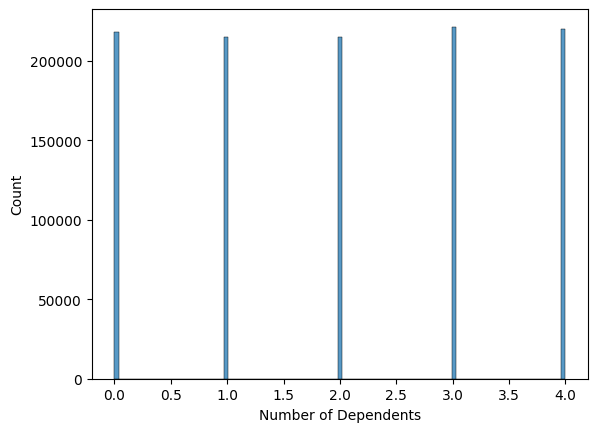

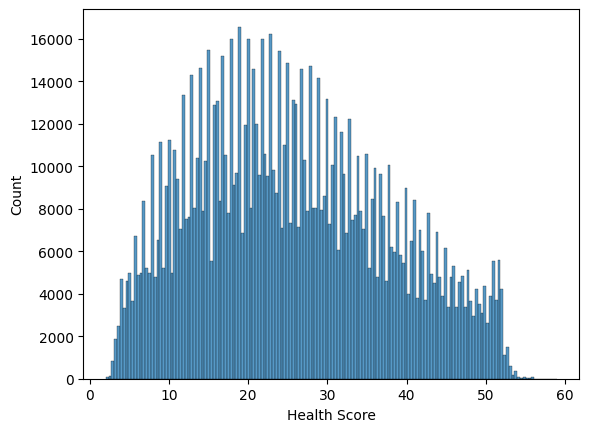

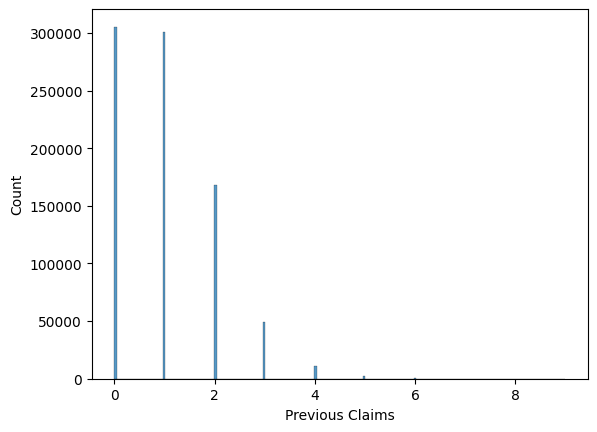

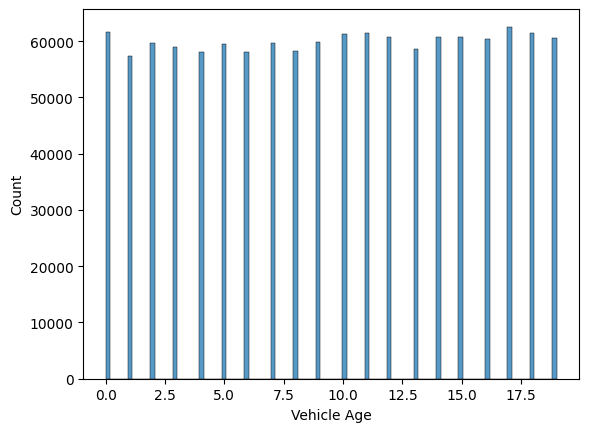

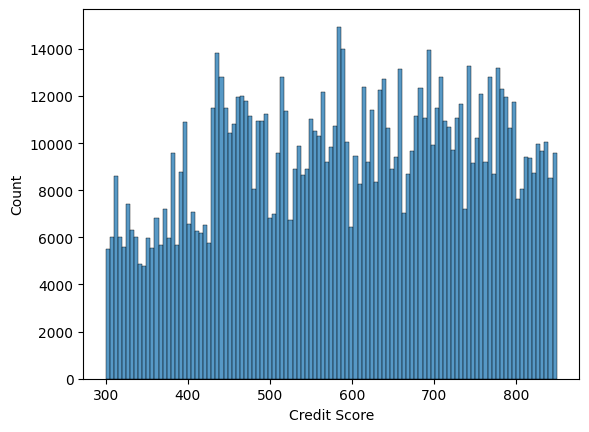

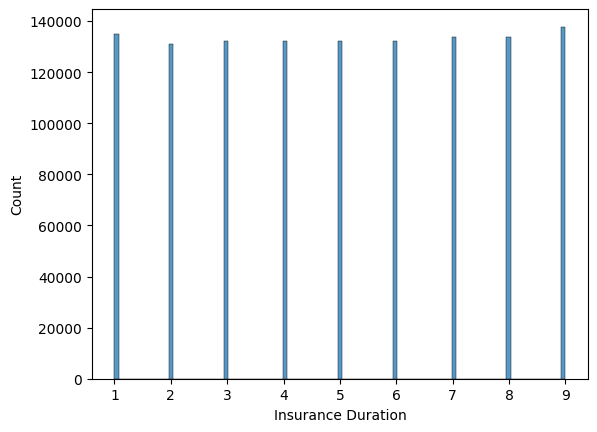

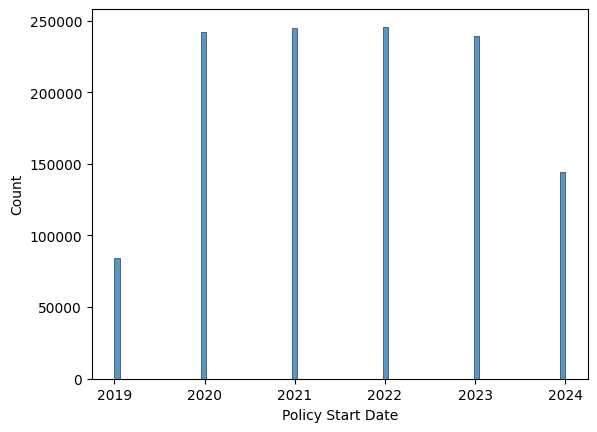

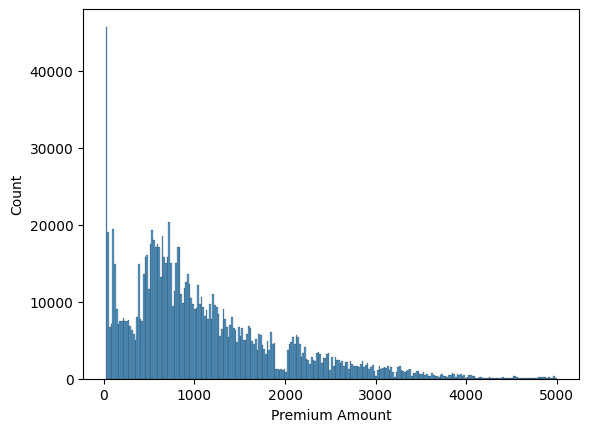

In [ ]:
for i in data.select_dtypes(include='number').columns:
  sns.histplot(data=data,x=i)
  plt.show()

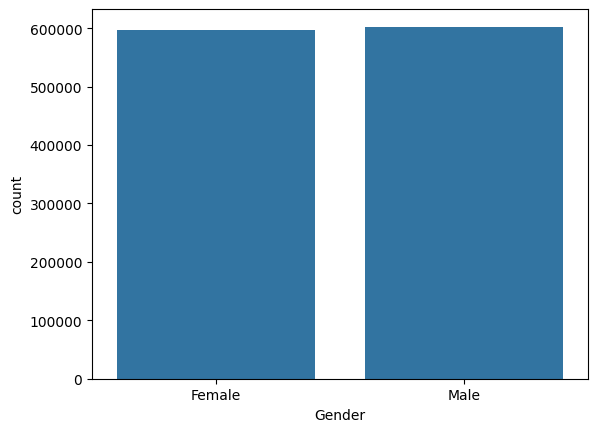

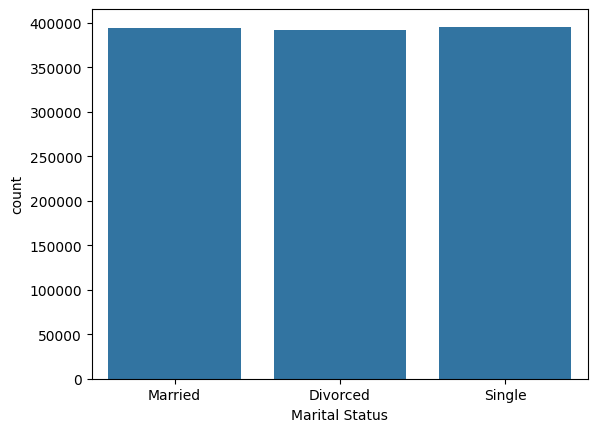

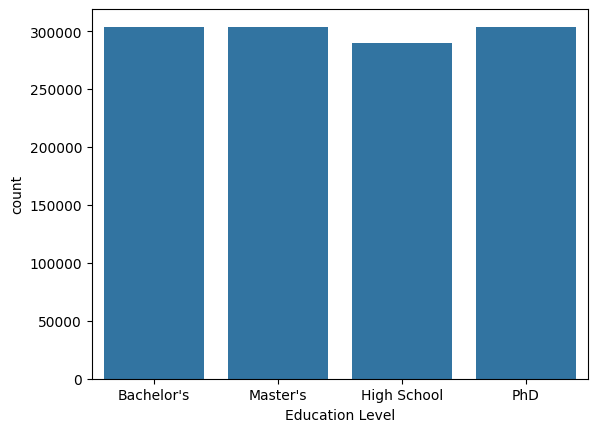

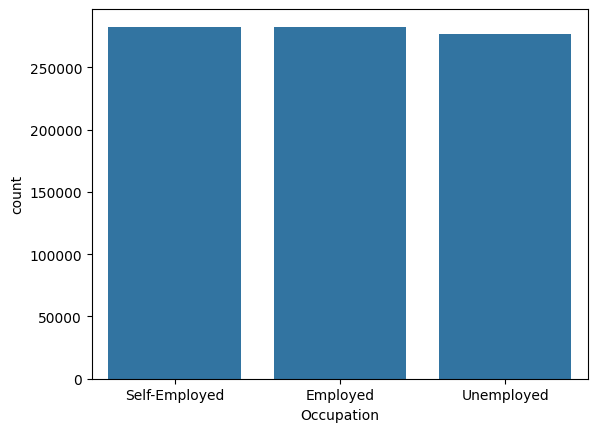

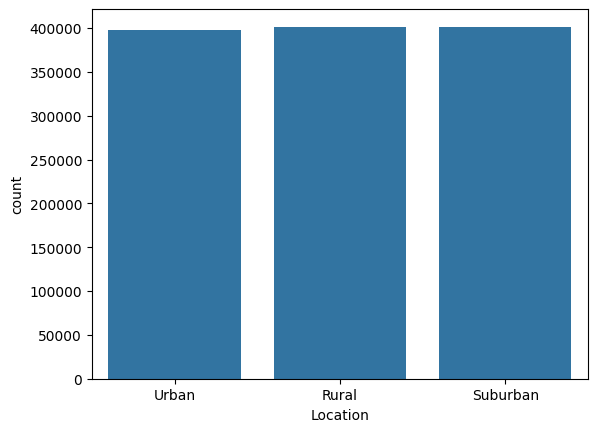

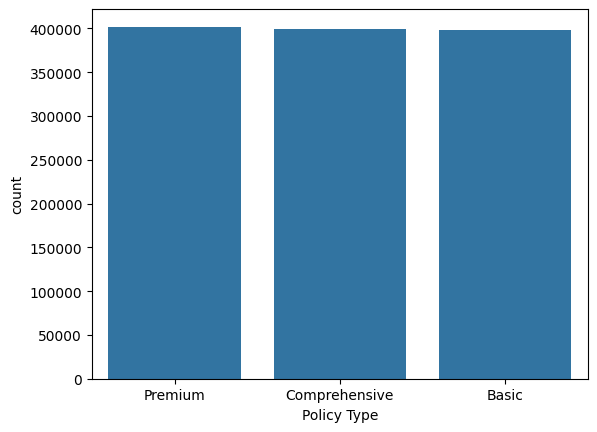

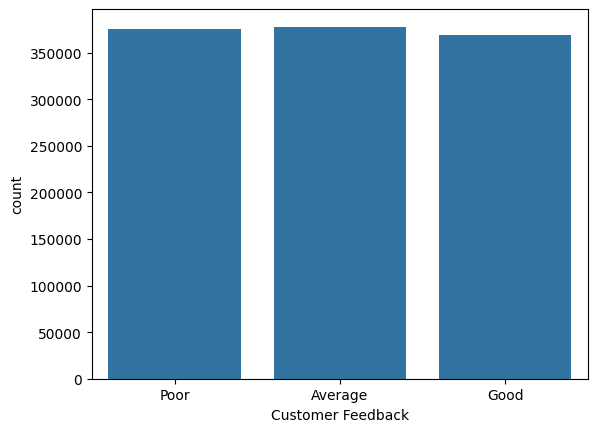

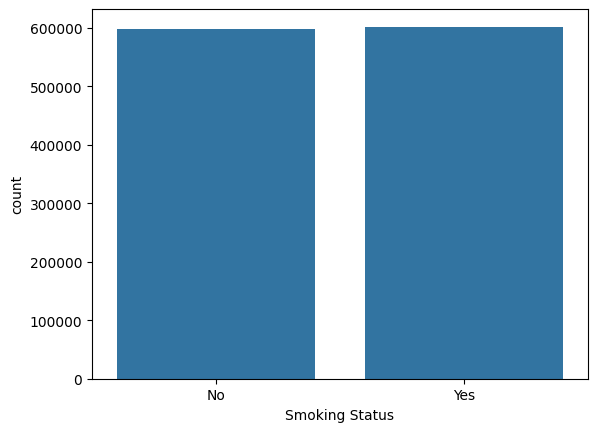

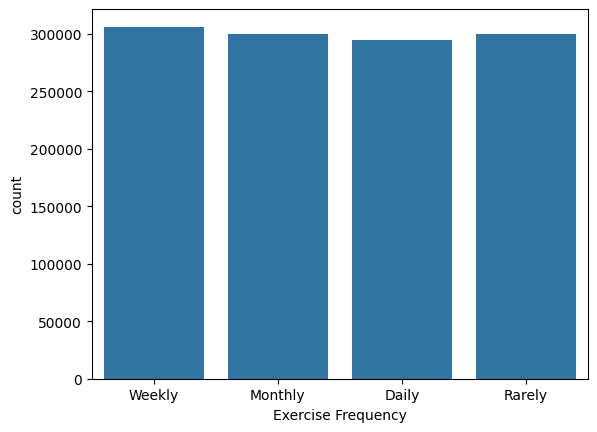

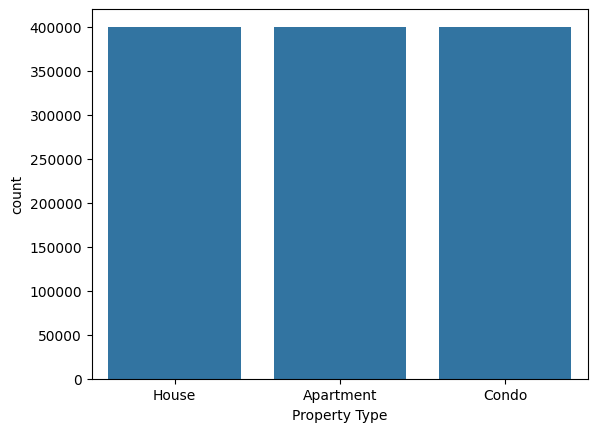

In [ ]:
for i in data.select_dtypes(include='object').columns:
  sns.countplot(data=data,x=i)
  plt.show()

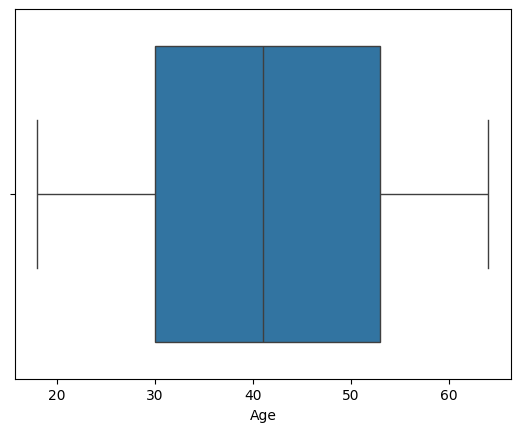

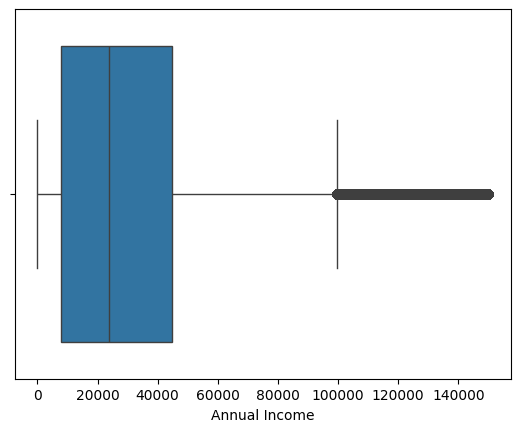

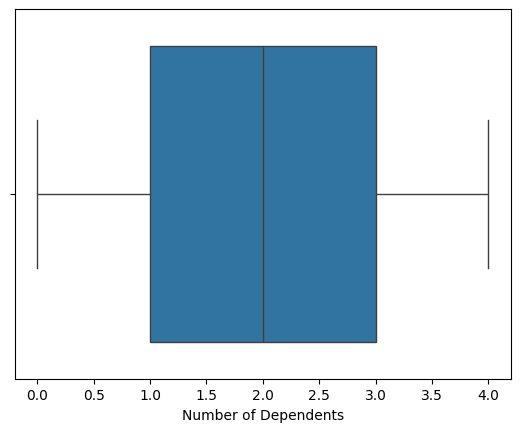

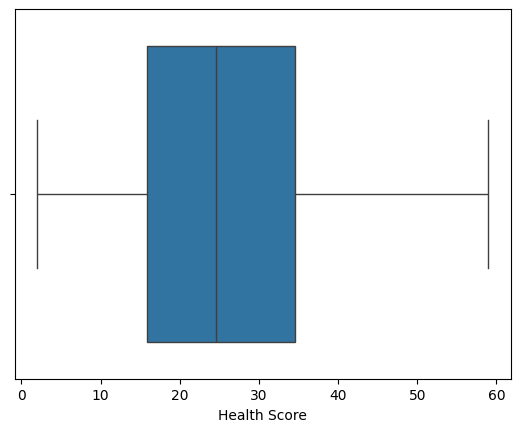

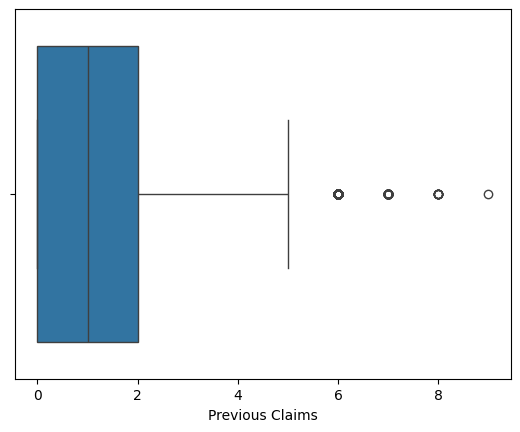

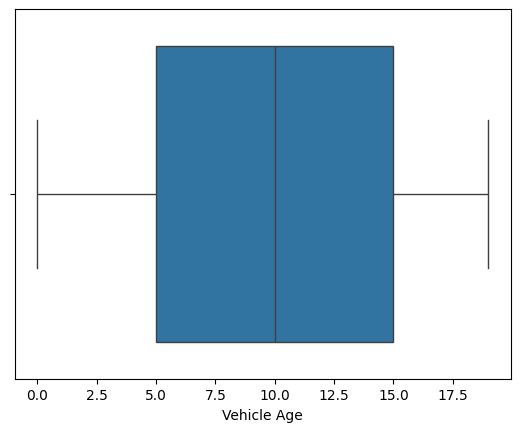

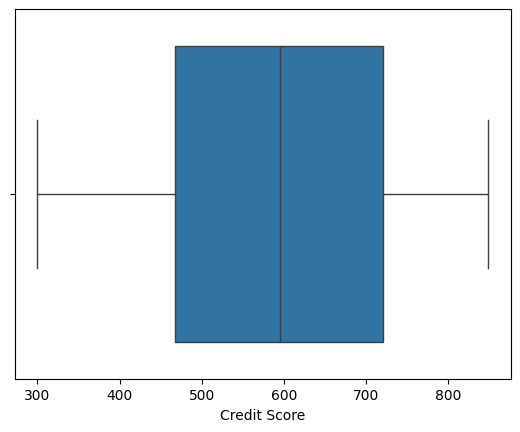

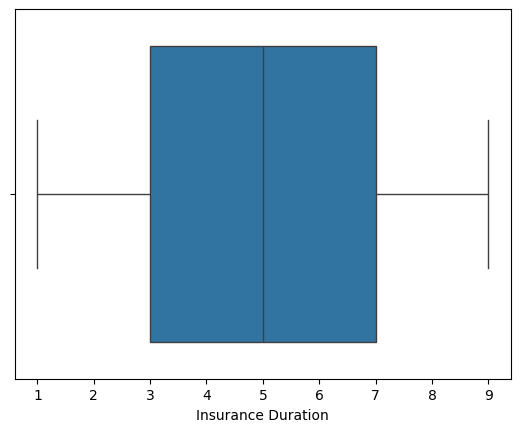

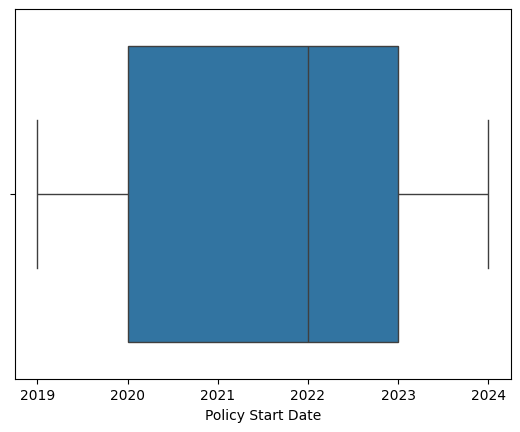

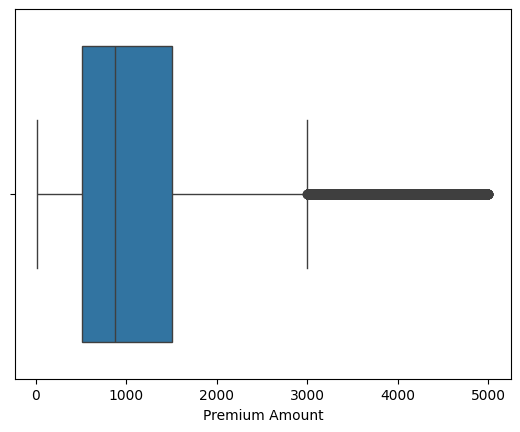

In [ ]:
for i in data.select_dtypes(include='number').columns:
  sns.boxplot(data=data,x=i)
  plt.show()

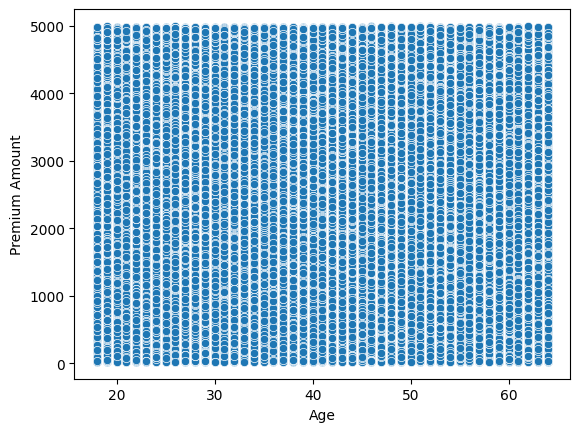

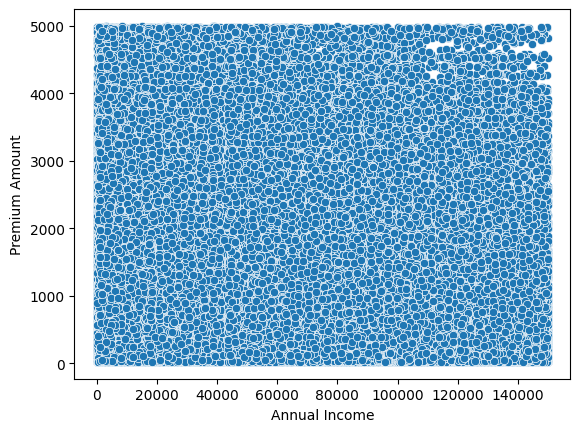

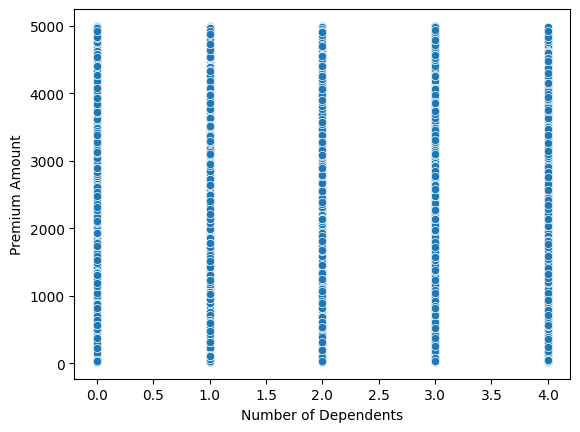

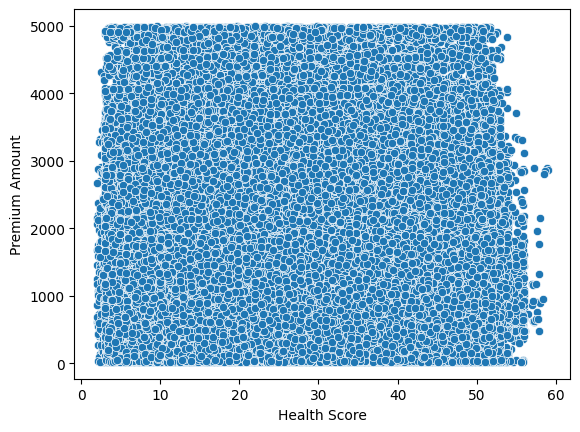

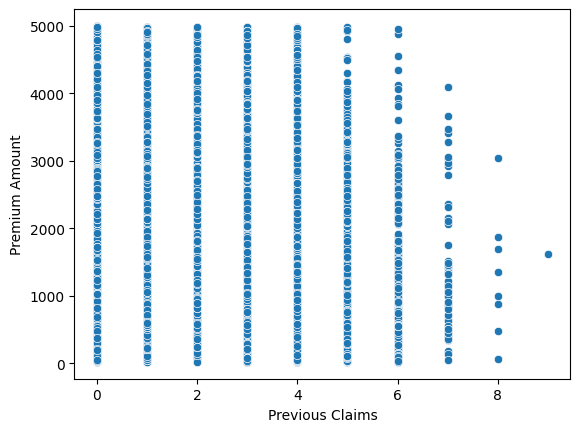

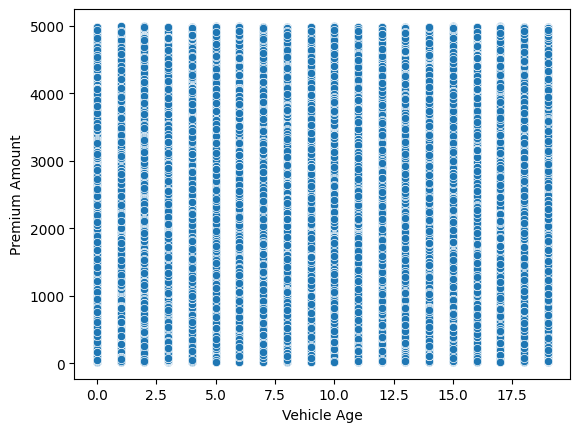

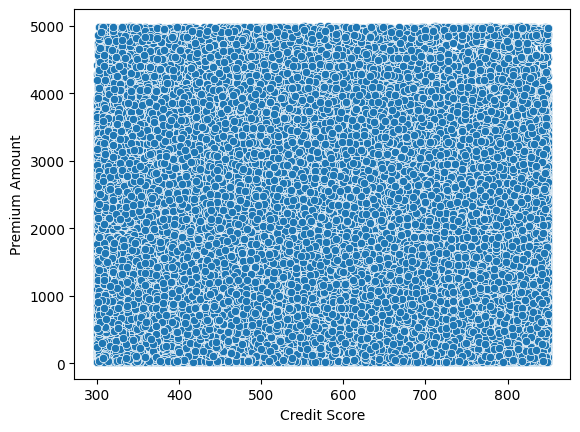

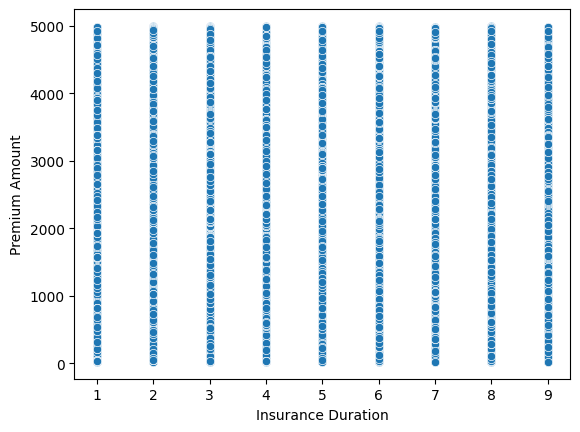

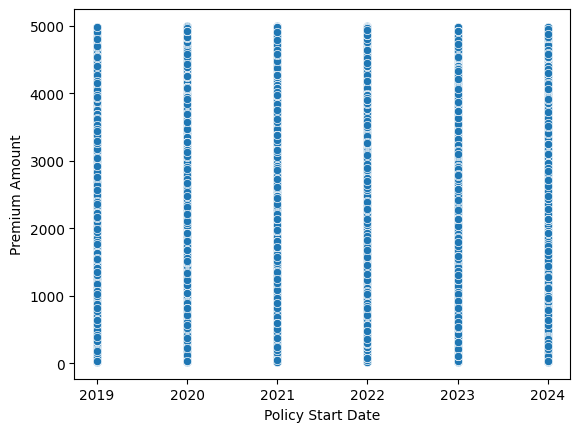

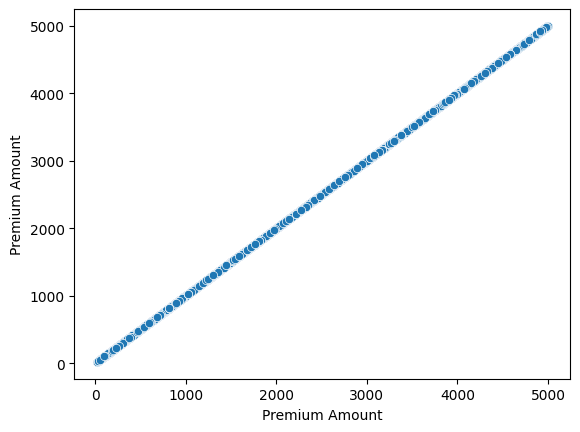

In [ ]:
for i in data.select_dtypes(include='number').columns:
  sns.scatterplot(data,x=i,y='Premium Amount')
  plt.show()

[]

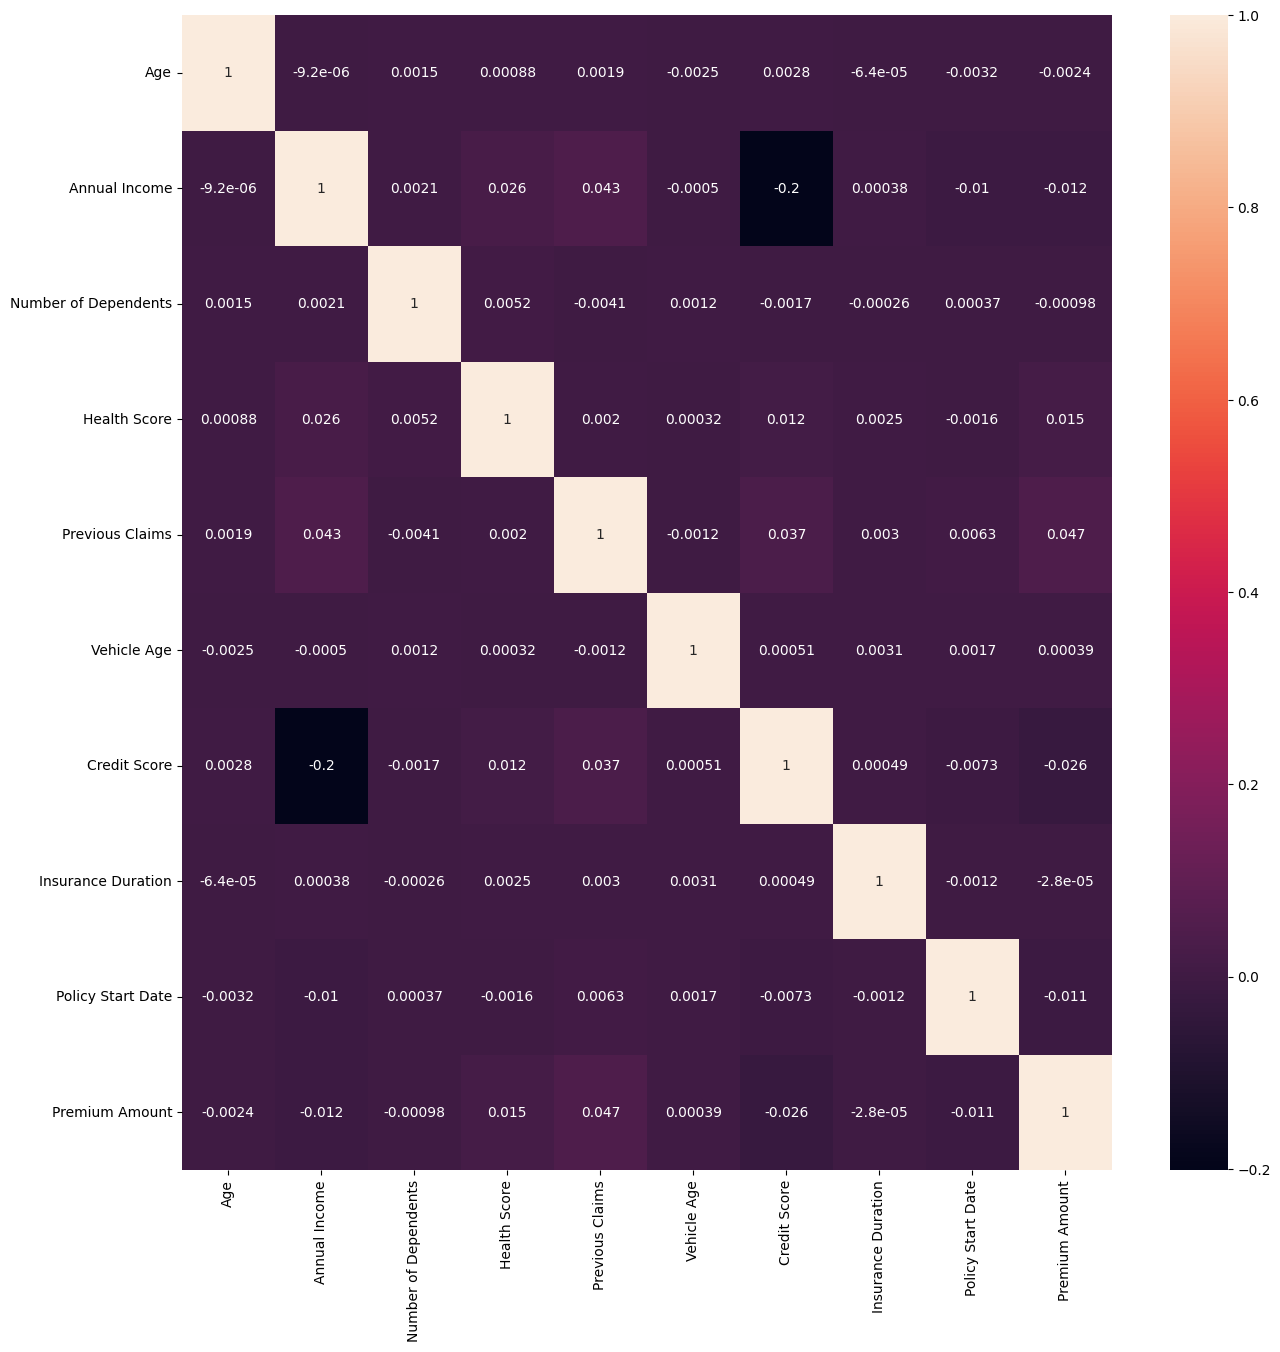

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True)
plt.plot()

In [ ]:
x=data.drop('Premium Amount',axis=1)
y=data[['Premium Amount']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in x.select_dtypes(include='object').columns:
  x[i]=le.fit_transform(x[i])
  test_data[i]=le.transform(test_data[i])

In [ ]:
x

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,2,2.0,17.0,372.0,5.0,2023,2,0,3,2
1,39.0,0,31678.0,0,3.0,2,3,15.569731,0,1,1.0,12.0,694.0,2.0,2023,0,1,1,2
2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,2,1.0,14.0,NaN,3.0,2023,1,1,3,2
3,21.0,1,141855.0,1,2.0,0,3,10.938144,0,0,1.0,0.0,367.0,1.0,2024,2,1,0,0
4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,2,0.0,8.0,598.0,4.0,2021,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,0,27316.0,1,0.0,2,2,13.772907,2,2,NaN,5.0,372.0,3.0,2023,2,0,0,0
1199996,54.0,1,35786.0,0,NaN,2,1,11.483482,0,1,NaN,10.0,597.0,4.0,2022,2,0,3,0
1199997,19.0,1,51884.0,0,0.0,2,3,14.724469,1,0,0.0,19.0,NaN,6.0,2021,1,0,1,1
1199998,55.0,1,NaN,2,1.0,3,3,18.547381,1,2,1.0,7.0,407.0,4.0,2021,2,0,0,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
for i in x.select_dtypes(include='number').columns:
  x[i]=imputer.fit_transform(x[[i]])
  test_data[i]=imputer.transform(test_data[[i]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for i in x.select_dtypes(include='number').columns:
  x[i]=scaler.fit_transform(x[[i]])
  test_data[i]=scaler.transform(test_data[[i]])

In [ ]:
x

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,-1.652383,-1.004294,-0.680372,-0.040052,-0.796935,-1.341311,-0.516960,-0.223879,1.229445,1.221087,1.383143,1.286327,-1.351737,-0.007024,0.934365,0.934673,-1.003127,1.328261,1.224116
1,-0.172439,-1.004294,-0.003306,-1.221375,0.651486,0.439586,1.230682,-0.814566,-1.222424,-0.003359,0.320400,0.420705,0.795956,-1.163391,0.934365,-1.208378,0.996883,-0.459847,1.224116
2,-1.356395,0.995724,-0.193507,-1.221375,0.651486,-0.450862,-0.516960,1.841607,0.003510,1.221087,0.320400,0.766954,-0.938206,-0.777935,0.934365,-0.136853,0.996883,1.328261,1.224116
3,-1.504389,0.995724,3.445635,-0.040052,-0.072725,-1.341311,1.230682,-1.203783,-1.222424,-1.227805,0.320400,-1.656787,-1.385086,-1.548847,1.611868,0.934673,0.996883,-1.353901,-1.224873
4,-1.504389,0.995724,0.246278,1.141272,-0.796935,-1.341311,-0.516960,-0.410662,-1.222424,1.221087,-0.742343,-0.271792,0.155650,-0.392480,-0.420641,0.934673,0.996883,1.328261,1.224116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,-0.394431,-1.004294,-0.139852,-0.040052,-1.521145,0.439586,0.356861,-0.965563,1.229445,1.221087,-0.742343,-0.791165,-1.351737,-0.777935,0.934365,0.934673,-1.003127,-1.353901,-1.224873
1199996,0.937519,0.995724,0.125290,-1.221375,0.651486,0.439586,-0.516960,-1.157955,-1.222424,-0.003359,-0.742343,0.074456,0.148980,-0.392480,0.256862,0.934673,-1.003127,1.328261,-1.224873
1199997,-1.652383,0.995724,0.629216,-1.221375,-1.521145,0.439586,1.230682,-0.885598,0.003510,-1.227805,-0.742343,1.632575,-0.938206,0.378432,-0.420641,-0.136853,-1.003127,-0.459847,-0.000379
1199998,1.011517,0.995724,-0.773532,1.141272,-0.796935,1.330035,1.230682,-0.564338,0.003510,1.221087,0.320400,-0.444917,-1.118292,-0.392480,-0.420641,0.934673,-1.003127,-1.353901,-1.224873


In [ ]:
x.isnull().sum()

,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x,y)

DecisionTreeRegressor()

In [ ]:
preds=model.predict(test_data)

In [ ]:
submission_df=pd.read_csv('/content/playground-series-s4e12/sample_submission.csv')
submission_df

,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545
2,1200002,1102.545
3,1200003,1102.545
4,1200004,1102.545
...,...,...
799995,1999995,1102.545
799996,1999996,1102.545
799997,1999997,1102.545
799998,1999998,1102.545


In [ ]:
preds

array([2734., 2845., 1544., ...,  662., 1022.,  474.])

In [ ]:
submission_df['Premium Amount']=preds

In [ ]:
submission_df.to_csv('submission.csv',index=False)